In [1]:
import matplotlib.pyplot as plt
import imageio
import os
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
data_path = os.path.join(os.path.split(os.getcwd())[0],'data')
session_list = pd.read_csv(os.path.join(os.path.join(data_path,'session_list.csv')))

## get a list of all mice, minus the two mice with missing histology

In [3]:
missing_mice = ['M375765','M432805']

In [4]:
mouse_ids = [mouse_id for mouse_id in session_list['mouse_id'].unique() if mouse_id not in missing_mice]

## a basic plotting function

In [5]:
def plot_histology_image(mouse_id, ax):
    data_path = os.path.join(os.path.split(os.getcwd())[0],'data')
    histology_path = os.path.join(data_path, 'histology_images')
    
    if mouse_id in os.listdir(histology_path):
        mouse_path = os.path.join(histology_path, mouse_id)
        image_name = os.listdir(mouse_path)[0]
        im = imageio.imread(os.path.join(mouse_path, image_name))

        ax.imshow(im)
        ax.set_title('mouse_id = {}'.format(mouse_id))
        ax.axis('off')

## iterate over mice, show histology image in a 3x3 grid

/home/dougo/.local/lib/python3.7/site-packages/PIL/Image.py:2837: DecompressionBombWarning: Image size (131360320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


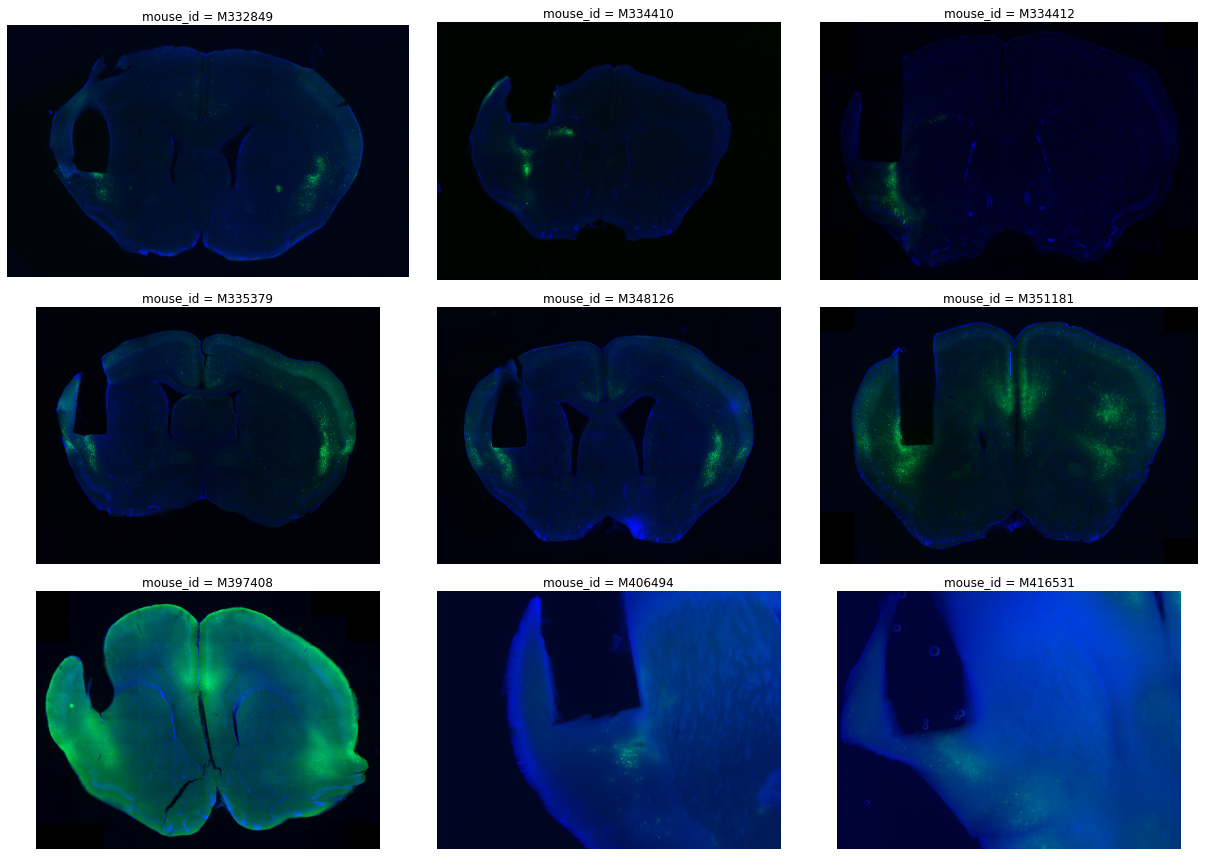

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(17, 12))

for ii, mouse_id in enumerate(np.sort(mouse_ids)):
    plot_histology_image(mouse_id, ax.flatten()[ii])
    
fig.tight_layout()